 #                                                **Exploring Breathcode data**

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Loading the data

In [2]:
data = pd.read_csv('../data/raw/All_Form_Entries.csv', dtype={'utm_content': 'object', 'current_download': 'object', 'state': 'object', 'lead_type': 'object', 'lead_generation_app':'object'})

C:\Users\danie\AppData\Local\Temp\ipykernel_27660\2882604904.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/raw/All_Form_Entries.csv', dtype={'utm_content': 'object', 'current_download': 'object', 'state': 'object', 'lead_type': 'object', 'lead_generation_app':'object'})


## Data Cleaning

**Changing column type of date columns**

In [4]:
data['created_at'].head()

0    2020-11-28 07:46:58.469198+00:00
1    2021-06-22 04:29:19.572742+00:00
2    2022-04-19 02:00:13.390512+00:00
3    2020-09-23 21:22:11.861392+00:00
4    2020-09-24 04:36:26.286289+00:00
Name: created_at, dtype: object

In [3]:
#Changing type of 3 datetime columns 

data[['created_at','updated_at','won_at']] = data[['created_at','updated_at','won_at']].apply(pd.to_datetime).copy()

In [4]:
data['created_at'] = data['created_at'].dt.strftime("%Y-%m-%d %H:%M:%S")
data['updated_at'] = data['updated_at'].dt.strftime("%Y-%m-%d %H:%M:%S")
data['won_at'] = data['won_at'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [5]:
data[['created_at','updated_at','won_at']] = data[['created_at','updated_at','won_at']].apply(pd.to_datetime).copy()

In [6]:
#The column of our interest is 'Created_at' so we'll convert and separate that one first

data['year-month'] = data['created_at'].dt.strftime('%Y-%m')
data['created_time'] = data['created_at'].dt.strftime('%H:%M:%S')

**Create a full name column**

In [7]:
#Combine first and last name ignoring nulls
data['fullname'] = data['first_name'].fillna('') + str(' ') + data['last_name'].fillna('')

In [8]:
# shift column 'Fullname' to first position
fourth_column = data.pop('fullname')

# insert column using insert(position,column_name,fourth_column) function
data.insert(3, 'fullname', fourth_column)

In [9]:
#drop first and last name columns
data.drop(['first_name', 'last_name'], axis=1, inplace=True)

**Dropping columns with 100% of null values and also non relevant columns**

<Figure size 1080x1080 with 0 Axes>

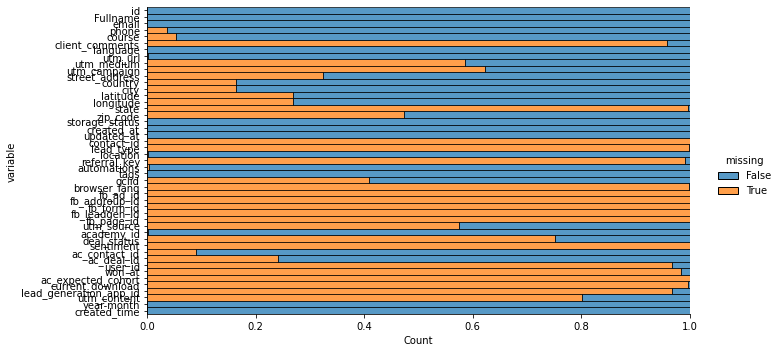

In [9]:
plt.figure(figsize=(15,15))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)
plt.show()

In [10]:
#Let's drop columns that have all null values.

data.dropna(axis=1, how='all', inplace=True)

In [11]:
#Let's also drop not relevant columns.

data = data.drop(['phone','client_comments','street_address','city','latitude','longitude','state',
                  'zip_code','referral_key','browser_lang','ac_expected_cohort','current_download','utm_content',
                  'storage_status','user_id','ac_contact_id'], axis=1).copy()

In [12]:
#Dropping rows that were only for test (identify the rest of test emails pending)
data.drop(data[data['utm_source'] == 'test_s'].index, inplace = True)
data.drop(data[data['utm_source'] == 'fintech'].index, inplace = True)

In [13]:
#some test rows identified
data = data[data["email"].str.contains("@4geeks") == False]

**Reduce dataframe to only one application (first) per email, and combine with duplicated (if so)**

In [14]:
#How many unique emails are there in the dataset?
data['email'].nunique()

34758

**Testing the removal and combination of duplicates**

In [15]:
# Creating a duplicates dataframe to try different methods to combine data

duplicateRowsDF = data[data.duplicated(['email'],keep= False)]
print("All Duplicate Rows based on email:"," ", duplicateRowsDF.shape)

duplicateRowsDF.groupby(['email','created_at','utm_medium','utm_source']).size()

All Duplicate Rows based on email:   (18821, 24)


email                         created_at           utm_medium  utm_source 
02sergioconde@gmail.com       2021-11-02 01:19:40  cpc         google         1
123malber.olivares@gmail.com  2022-05-08 02:08:10  ppc         fb             1
                              2022-06-24 02:39:59  ppc         fb             1
1928nathalia@gmail.com        2022-02-14 22:58:04  cpc         google         1
                              2022-02-14 23:00:52  cpc         google         1
                                                                             ..
zuberlye@gmail.com            2022-03-02 20:25:26  ppc         ig             1
zuluaganeider@gmail.com       2022-04-27 19:16:07  cpc         google         1
                              2022-04-27 19:32:06  cpc         google         1
zumanzuesaubrey29@gmail.com   2022-05-17 14:52:29  referral    careerkarma    1
                              2022-05-17 14:54:14  cpc         google         1
Length: 5483, dtype: int64

In [16]:
duplicateRowsDF = duplicateRowsDF.replace("Nan", np.nan)

# Option 1

data1 = duplicateRowsDF.sort_values("created_at")


In [17]:
data1.head(7)

,id,fullname,email,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,tags,gclid,utm_source,academy_id,deal_status,ac_deal_id,won_at,lead_generation_app_id,year-month,created_time
32,99,Patricia Sanchez,2231valemati@gmail.com,full-stack,es,https://4geeksacademy.co/es/course/desarrollo-...,NaN,NaN,Venezuela,2020-09-22 11:28:12,...,request_more_info,NaN,NaN,1.0,NaN,NaN,NaT,NaN,2020-09,11:28:12
46,100,Patricia Sanchez,2231valemati@gmail.com,NaN,es,https://4geeksacademy.co/es/aplica,NaN,NaN,Venezuela,2020-09-22 11:54:39,...,website-lead,NaN,NaN,8.0,NaN,NaN,NaT,NaN,2020-09,11:54:39
14,106,Annelis Fuenmayor,annelisfuenmayor@gmail.com,full-stack,es,https://4geeksacademy.co/us/apply,NaN,NaN,Chile,2020-09-22 13:07:16,...,website-lead,NaN,NaN,5.0,NaN,NaN,NaT,NaN,2020-09,13:07:16
49,107,Anne F,annelisfuenmayor@gmail.com,software-engineering,es,https://4geeksacademy.co/us/apply,NaN,NaN,Chile,2020-09-22 13:07:38,...,website-lead,NaN,NaN,5.0,NaN,NaN,NaT,NaN,2020-09,13:07:38
51,112,Patricia Sanchez,2231valemati@gmail.com,full-stack,es,https://4geeksacademy.co/es/aplica,NaN,NaN,Venezuela,2020-09-22 15:30:37,...,website-lead,NaN,NaN,8.0,NaN,NaN,NaT,NaN,2020-09,15:30:37
8,114,Patricia Sanchez,2231valemati@gmail.com,full-stack,es,https://4geeksacademy.co/es/aplica,NaN,NaN,NaN,2020-09-22 17:16:51,...,website-lead,NaN,NaN,7.0,NaN,NaN,NaT,NaN,2020-09,17:16:51
33,115,Patricia Sanchez,2231valemati@gmail.com,NaN,es,https://4geeksacademy.co/us/location/online-re...,NaN,NaN,Venezuela,2020-09-22 17:17:38,...,request_more_info,NaN,NaN,1.0,NaN,NaN,NaT,NaN,2020-09,17:17:38


In [18]:
data1 = data1.groupby("email").first().reset_index()
data1.head()

,email,id,fullname,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,tags,gclid,utm_source,academy_id,deal_status,ac_deal_id,won_at,lead_generation_app_id,year-month,created_time
0,010.sergio@gmail.com,982,Sergio,software-engineering,es,https://4geeksacademy.co/es/course/ingenieria-...,None,None,Remoto,2020-11-05 22:43:38,...,request_more_info,Cj0KCQiA7qP9BRCLARIsABDaZzjSqM5HLJ_mnXJR0chAmh...,None,7.0,None,NaN,NaT,NaN,2020-11,22:43:38
1,02sergioconde@gmail.com,15671,Sergio,full-stack,en,https://4geeksacademy.com/es/aplica,cpc,12321016929,Spain,2021-11-02 01:19:40,...,website-lead,CjwKCAjwoP6LBhBlEiwAvCcthEg_m41UBa1VgX4neAax9f...,google,6.0,LOST,29045.0,NaT,NaN,2021-11,01:19:40
2,07.ebad@gmail.com,40414,Ebad Abid,full-stack,en,https://4geeksacademy.com/us/apply,None,None,France,2022-06-29 16:41:53,...,website-lead,None,None,4.0,None,57652.0,NaT,NaN,2022-06,16:41:53
3,0wenbartlet@gmail.com,17693,Owen bartlett,full-stack,en,https://4geeksacademy.com/us/coding-bootcamps/...,None,None,Mexico,2021-11-30 21:16:31,...,request_more_info,None,None,7.0,None,30652.0,NaT,NaN,2021-11,21:16:31
4,10903alm@gmail.com,11875,Alpheus Legoke Mokgalaka,machine-learning-engineering,us,https://4geeksacademy.com/us/landing/scholarsh...,None,None,France,2021-09-14 19:07:17,...,website-lead,None,landingjobs?utm_medium=machine-learning-engine...,10.0,LOST,25851.0,NaT,NaN,2021-09,19:07:17


In [19]:
data1[data1['email']== 'afuenmayor@4geeks.co']

,email,id,fullname,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,tags,gclid,utm_source,academy_id,deal_status,ac_deal_id,won_at,lead_generation_app_id,year-month,created_time


**Implementing the removal and combination of duplicates**

In [15]:
data = data.replace("Nan", np.nan).copy()
data = data.sort_values("created_at").copy()
data = data.groupby("email").first().reset_index()

In [16]:
data.shape

(34758, 24)

--------> **a way to discover where do utm_source strange labels belong to:** 

In [19]:
data[data['utm_source'] =='clubhouse']['utm_medium']

1496    None
Name: utm_medium, dtype: object

**--------> a way to discover where do utm_medium strange labels belong to:**

In [104]:
data[data['utm_source'] =='clubhouse']

,id,Fullname,email,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,gclid,utm_source,academy_id,deal_status,ac_deal_id,won_at,lead_generation_app_id,year-month,created_time,has_gclid
8587,39526,Zakaria,Zakaria.amine95@gmail.com,full-stack,en,https://4geeksacademy.com/us/apply,NaN,NaN,France,2022-06-25 17:38:47.246774+00:00,...,NaN,clubhouse,10.0,0,56836.0,NaT,NaN,2022-06,17:38:47,0


**Let's identify if a lead has gclid assigning 1 for True, and 0 for False.**

In [17]:
data['has_gclid'] = np.where(data['gclid'].isnull(), '0', '1')

In [18]:
data['has_gclid'].value_counts()

1    22588
0    12170
Name: has_gclid, dtype: int64

**Fixing Courses**

In [19]:
data['course'].value_counts()

full-stack                      28822
software-engineering             1685
machine-learning-engineering     1618
full-stack-ft                    1233
machine-learning                   80
node-js                            31
full_stack                          9
machine-learning-enginnering        2
coding-introduction                 1
Name: course, dtype: int64

In [20]:
data['course'] = data['course'].replace(['full-stack-ft', 'full_stack', 'full-stack,software-engineering',
                                         'coding-introduction','outcomes'], 'full-stack')

In [21]:
data['course'] = data['course'].replace(['machine-learning', 'machine-learning-enginnering'], 
                                        'machine-learning-engineering')

In [20]:
data['course'].value_counts()

full-stack                      38668
software-engineering             2706
machine-learning-engineering     2417
node-js                            65
Name: course, dtype: int64

**4. Location**

Let's correct the 2 different typings in Maracaibo and Cortijos

In [22]:
data['location'] = data['location'].replace(['maracaibo'], 'maracaibo-venezuela')

In [23]:
data['location'] = data['location'].replace(['los-cortijos-caracas'], 'caracas-venezuela')

In [23]:
data['location'].value_counts()

santiago-chile           8634
caracas-venezuela        7920
madrid-spain             6754
downtown-miami           4515
online                   3837
bogota-colombia          3691
costa-rica               3651
europe                   2653
orlando                  1339
buenosaires-argentina    1221
mexicocity-mexico        1054
quito-ecuador             357
montevideo-uruguay        247
sanjose-uruguay           149
panamacity-panama         106
barcelona-spain            28
lapaz-bolivia              26
toronto-canada             20
berlin-germany             16
valencia-spain             16
rome-italy                 15
malaga-spain               14
lisbon-portugal            11
lima-peru                   9
maracaibo-venezuela         7
milan-italy                 2
munich-germany              2
lisboa-portugal             2
dublin-ireland              1
hamburg-germany             1
Name: location, dtype: int64

**Fixing Language**

Consider 'us' language inside 'en' for english.

In [24]:
data['language'].value_counts()

en    15813
es    13572
us     5373
Name: language, dtype: int64

In [25]:
data['language'] = data['language'].replace('us', 'en')

In [26]:
data['language'].value_counts()

en    21186
es    13572
Name: language, dtype: int64

**Fixing utm_source**

In [34]:
data['utm_source'].value_counts()

google                                                 6218
instagram                                              2385
facebook                                               2122
ig                                                     1719
fb                                                     1549
careerkarma                                            1422
landingjobs?utm_medium=machine-learning-engineering     538
coursereport                                            201
Facebook ads                                            131
aprendemas                                              123
landingjobs?utm_medium=full-stack                       115
zoho_recruite                                            81
Facebook                                                 71
facebook_instagram                                       55
bing                                                     48
ActiveCampaign                                           41
landingjobs?utm_medium=RRSS             

In [43]:
#Before making any changes, we should make sure where do those long numbers belong to: instagram or facebook?

pd.options.display.max_rows = 200
data.groupby(['utm_source','utm_medium']).size()

utm_source                   utm_medium                       
4geeks                       rrss                                   22
ActiveCampaign               email                                  41
PR?utm_medium=nota-prensa-1  cpc                                     1
aprendemas                   referral                              123
bing                         cpc                                    48
bootcamprankings             schoolpage                              4
careerkarma                  referral                             1393
                             schoolpage                              9
                             schoolpage?utm_source=careerkarma      12
coursereport                 Blog                                    1
                             affiliate_email                         1
                             coursereportschoolpage                199
educaedu                     referral                                2
educaweb      

**First Conditional assignations**

In [53]:
data['utm_medium'] = np.where((data['utm_source'] == 'Facebook ads') | 
                              (data['utm_source'] == 'Facebook_Marketplace') | 
                              (data['utm_source'] == 'Facebook_Mobile_Feed') |
                              (data['utm_source'] == 'facebook_awareness') |
                              (data['utm_source'] == 'Facebook_Stories') |
                              (data['utm_source'] == 'Facebook_Desktop_Feed') |
                              (data['utm_source'] == 'Business Manager IG') |
                              (data['utm_source'] == 'Instagram_Feed') |
                              (data['utm_source'] == 'Instagram_Stories'), 
                              'cpc', data['utm_medium'])

data['utm_source'] = np.where((data['utm_medium'] == 'Instagram_Stories') |
                              (data['utm_medium'] == 'Instagram_Feed'),
                              'instagram', data['utm_source'])

data['utm_source'] = np.where((data['utm_medium'] == 'Facebook_Mobile_Feed'),
                              'facebook', data['utm_source'])

**Fixing utm_source spelling**

In [36]:
#Fixing coursereport spelling

data['utm_source'] = data['utm_source'].replace('CourseReport', 'coursereport')

In [37]:
#Fixing linkedin spelling

data['utm_source'] = data['utm_source'].replace('LInkedin', 'linkedin' )

In [39]:
#Fix all landingjobs spelling.

data['utm_source'] = data['utm_source'].replace(['landingjobs?utm_medium=machine-learning-engineering', 
                                                 'landingjobs?utm_medium=full-stack', 'landingjobs?utm_medium=RRSS'],
                                                'landingjobs')

In [40]:
#Replace google_ads with google

data['utm_source'] = data['utm_source'].replace('google_ads', 'google')

In [55]:
#Replace all different names of instagram to 'instagram'

data['utm_source'] = data['utm_source'].replace(['Business Manager IG', 'Instagram_Feed', 'ig', 'Instagram_Stories'], 'instagram')

In [56]:
#Replace all different names of facebook to 'facebook'

data['utm_source'] = data['utm_source'].replace(['Facebook','Facebook ads','Facebook_Marketplace','Facebook_Mobile_Feed',
                                                'facebook_instagram','fb','an','facebook_awareness','Facebook_Stories',
                                                'Facebook_Desktop_Feed'], 'facebook')

In [57]:
#replacing differnet names of ticjob
data['utm_source'] = data['utm_source'].replace('4geeks', 'ticjob')

In [58]:
data['utm_source'].value_counts()

google                         6220
instagram                      4121
facebook                       3959
careerkarma                    1422
landingjobs                     682
coursereport                    201
aprendemas                      123
zoho_recruite                    81
bing                             48
ActiveCampaign                   41
ticjob                           40
PR?utm_medium=nota-prensa-1      15
python-es                         7
linkedin                          7
qsd.com                           6
bootcamprankings                  4
hs_email                          3
hired                             2
educaedu                          2
educaweb                          2
youtube                           1
techhub                           1
clubhouse                         1
Name: utm_source, dtype: int64

**8. Fixing utm_medium:** 

Assing 'referral' to all schoolpage values.
    
Assign referral to all landingjob utm_source.
    
Verify with gclid if a medium should be cpc or not.
    
Join cpc with ppc.


In [78]:
data.groupby(['utm_source','utm_medium','has_gclid']).size()

utm_source                   utm_medium            has_gclid
ActiveCampaign               email                 0              35
                                                   1               6
PR?utm_medium=nota-prensa-1  cpc                   1               1
aprendemas                   referral              0             120
                                                   1               3
bing                         cpc                   0              48
bootcamprankings             referral              0               3
                                                   1               1
careerkarma                  referral              0              21
                                                   1            1393
coursereport                 referral              0             192
                                                   1               9
educaedu                     referral              0               2
educaweb                     referral     

In [82]:
data['utm_medium'].value_counts()

cpc         14538
referral     2579
email          50
social          3
Inmail          1
organic         1
event           1
Name: utm_medium, dtype: int64

In [88]:
#Fixing referral

data['utm_medium'] = data['utm_medium'].replace(['schoolpage','coursereportschoolpage', 'schoolpage?utm_source=careerkarma',
                                                 'Blog','affiliate_email','rrss','inscripcion','event'], 'referral')

In [81]:
#Fixing cpc

data['utm_medium'] = data['utm_medium'].replace(['ppc','FB paid','Facebook_Mobile_Feed','Instagram_Stories','Instagram_Feed'],
                                                'cpc')

In [84]:
data['utm_medium'] = np.where((data['utm_source'] == 'linkedin') & (data['utm_medium'] == 'social') , 
                              'cpc', data['utm_medium'])

data['utm_medium'] = np.where((data['utm_source'] == 'linkedin') & (data['utm_medium'] == 'Inmail') , 
                              'cpc', data['utm_medium'])

In [89]:
data['utm_medium'].value_counts()

cpc         14542
referral     2580
email          50
organic         1
Name: utm_medium, dtype: int64

**Assign lead_types depending on the tags.**

In [43]:
data['tags'].value_counts()

request_more_info                    26719
website-lead                         17821
newsletter                             859
contact-us                             404
request_downloadable                   168
utec-uruguay                           149
hiring-partner                         102
jobboard-lead                           81
website-lead,blacks-in-technology       43
download_outcome                        23
Name: tags, dtype: int64

In [36]:
data.loc[data['tags'] == 'request_more_info', 'lead_type'] = 'SOFT'
data.loc[data['tags'] == 'website-lead', 'lead_type'] = 'STRONG'
data.loc[data['tags'] == 'newsletter', 'lead_type'] = 'DISCOVERY'
data.loc[data['tags'] == 'contact-us', 'lead_type'] = 'SOFT'
data.loc[data['tags'] == 'utec-uruguay', 'lead_type'] = 'STRONG'
data.loc[data['tags'] == 'jobboard-lead', 'lead_type'] = 'STRONG'
data.loc[data['tags'] == 'hiring-partner', 'lead_type'] = 'OTHER'
data.loc[data['tags'] == 'download_outcome', 'lead_type'] = 'DISCOVERY'
data.loc[data['tags'] == 'website-lead,blacks-in-technology', 'lead_type'] = 'STRONG'
data.loc[data['tags'] == 'request_downloadable', 'lead_type'] = 'DISCOVERY'

In [45]:
data['lead_type'].value_counts()

SOFT         27123
STRONG       18094
DISCOVERY     1050
OTHER          102
Name: lead_type, dtype: int64

## Feature Engineering

2. Qty of days from first contact until becoming a client

In [37]:
data['days_to_convert'] = (data['won_at'] - data['created_at']).dt.days.abs()

In [38]:
data.shape

(46222, 26)

In [60]:
leads_data = data.copy()

In [61]:
leads_data.shape

(45077, 27)

*Data ready for leads consultations*
 - - - - - - - - - - - - - - - - - 

**Data from only leads that converted to won**

In [62]:
won_df = leads_data[leads_data['subscribed'] == "1"]
won_df.head(10)

,id,first_name,email,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,academy_id,deal_status,ac_contact_id,ac_deal_id,user_id,won_at,lead_generation_app_id,subscribed,has_gclid,days_to_convert
23,7393,Jesus Bruque Guerrero,bruke3_voleyutrera@hotmail.com,full-stack,es,facebook_form_182669996627327,cpc,[SIDN] Clientes potenciales,NaN,2021-05-24,...,6.0,WON,26268.0,22208.0,4023.0,2021-12-01,NaN,1,1,191.0
55,143,Vanessa,lamarque.van@gmail.com,full-stack,en,https://4geeksacademy.co/us/apply,NaN,NaN,USA,2020-09-24,...,4.0,WON,18291.0,21352.0,NaN,2021-10-19,NaN,1,0,390.0
338,556,Jorge,uv.mhjl@gmail.com,NaN,en,https://4geeksacademy.co/,NaN,NaN,United States,2020-10-14,...,4.0,WON,18794.0,16264.0,NaN,2022-05-24,NaN,1,0,587.0
383,32482,Francisco Mandujano,franciscomandujanoe@gmail.com,full-stack,en,https://4geeksacademy.com/es/aplica,NaN,NaN,Chile,2022-04-28,...,5.0,WON,47734.0,51022.0,4887.0,2022-06-13,NaN,1,0,46.0
417,22029,stefany albarran,stefa161013@gmail.com,full-stack,en,https://4geeksacademy.com/es/coding-bootcamps/...,NaN,NaN,Spain,2022-01-26,...,6.0,WON,38622.0,34365.0,NaN,2022-05-24,NaN,1,0,118.0
422,689,Kenneth,kparra7491@gmail.com,full-stack,en,https://4geeksacademy.co/us/apply,NaN,NaN,Spain,2020-10-20,...,4.0,WON,19138.0,16584.0,NaN,2022-05-24,NaN,1,0,581.0
466,26650,Gladys Sánchez Quiroz,gsanchezquiroz@outlook.com,full-stack,en,https://4geeksacademy.com/es/coding-bootcamps/...,NaN,NaN,Venezuela,2022-03-05,...,2.0,WON,42855.0,45427.0,4880.0,2022-05-03,NaN,1,0,59.0
858,8323,Italo,italog.penaloza@gmail.com,full-stack,en,https://4geeksacademy.com/us/financials,NaN,NaN,Chile,2021-06-25,...,5.0,WON,27361.0,22983.0,NaN,2021-08-09,NaN,1,0,45.0
1086,1376,Felipe Tomás Arancibia Torres,arancibiat.felipe@gmail.com,full-stack,es,https://4geeksacademy.co/es/course/desarrollo-...,NaN,NaN,Remoto,2020-11-26,...,7.0,WON,47808.0,51099.0,NaN,2022-05-06,NaN,1,0,526.0
1189,1466,Alvaro Brante,acbrante@gmail.com,full-stack,es,https://4geeksacademy.co/es/course/desarrollo-...,NaN,NaN,Chile,2020-11-30,...,5.0,WON,20831.0,28834.0,NaN,2021-10-28,NaN,1,0,332.0


In [63]:
won_df.shape

(832, 27)